## Unsupervised Learning
### Segmentasi User --> Algoritma K - Prototypes --> K - Prototypes = K - Means + K - Modes

### Mempersiapkan Library

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import pickle
from pathlib import Path

## Membaca Data Pelanggan

In [23]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")

display(df.head())

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


## Melihat Informasi Dari Data

In [24]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


None

## Eksplorasi Dataset

### Eksplorasi Data Numerik

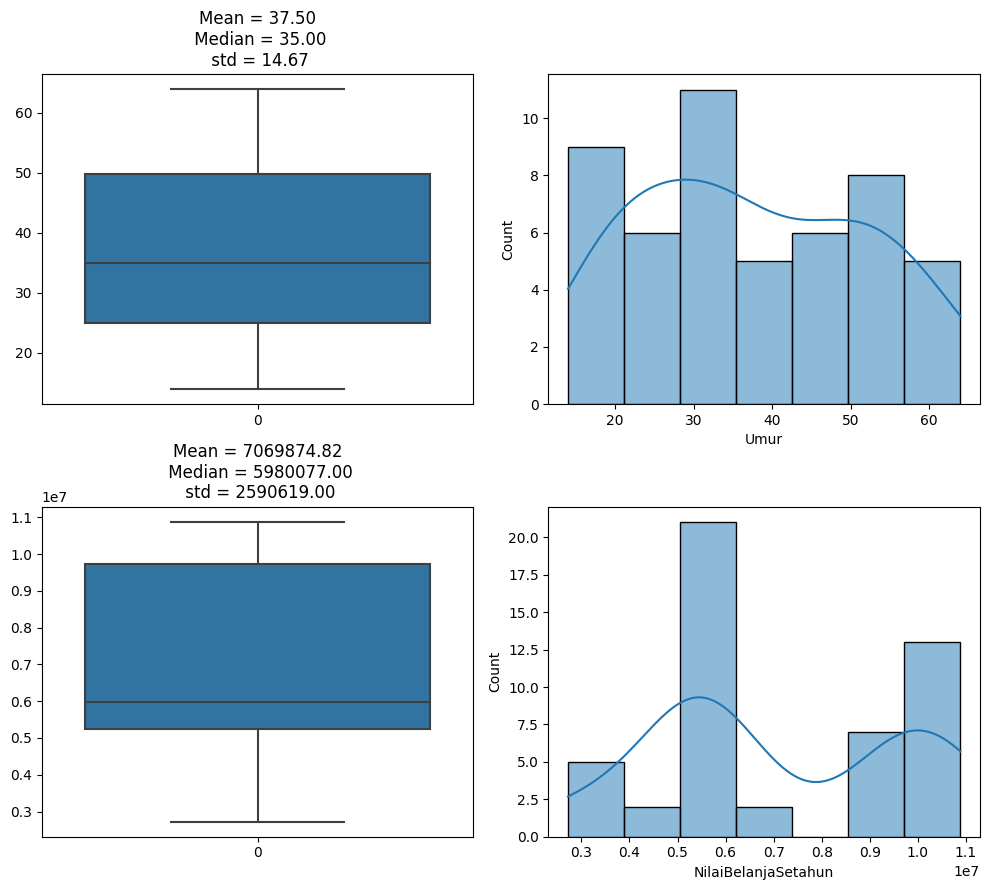

In [25]:
# Fungsi untuk membuat Plot
def obeservasi_num(features):
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, col in enumerate(features):
        sns.boxplot(data = df[col], ax = axs[i][0])
        sns.histplot(data = df[col], kde=True, ax = axs[i][1])
        axs[i][0].set_title("Mean = %.2f\n Median = %.2f\n std = %.2f"%(df[col].mean(), df[col].median(), df[col].std()))
    plt.tight_layout()
    plt.show()

# Memanggil Fungsi
numerik_columns = df.select_dtypes(include=["number"]).columns.to_list()
obeservasi_num(numerik_columns)

### Eksplorasi Data Kategorikal

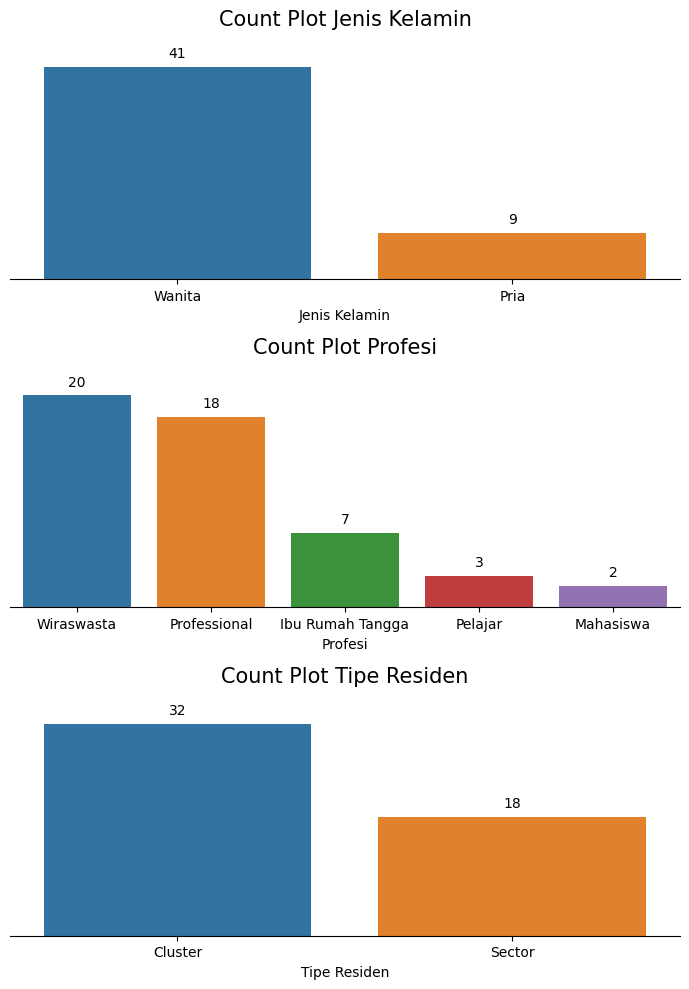

In [39]:
# Menyiapkan Kolom Kategorikal
categorical_columns = df.select_dtypes(exclude=["number"]).columns.to_list()
categorical_columns = [element for element in categorical_columns if element not in ['Customer_ID', 'Nama Pelanggan']]

# Membuat Canvas
fig, axs = plt.subplots(3, 1, figsize=(7, 10))

# Membuat Plot Untuk Setiap Categorical Column
for i, col in enumerate(categorical_columns):
    # Membuat Plot
    sns.countplot(data = df,x=col, order = df[col].value_counts().index, ax = axs[i])
    axs[i].set_title("Count Plot %s\n"%(col), fontsize=15)
    # Memberikan Anotasi
    for p in axs[i].patches:
        axs[i].annotate(
            format(p.get_height(), ".0f"),
            xy = (p.get_x() + p.get_width()/2, p.get_height()),
            ha="center",
            va="center",
            xytext = (0, 10),
            textcoords = "offset points"
        )
    # Setting Plot
    sns.despine(right=True, top=True, left=True)
    axs[i].axes.yaxis.set_visible(False)
    plt.tight_layout()

# Tampilkan Plot
plt.show()